#### Import Libraries

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant

In [2]:
df = pd.read_csv('firebase-1618885447171.csv')
df['minutes'] = df['time'].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]) + int(x[2])/60)
del df['time']
df.head()

,day,temp,humidity,minutes
0,1,22,45,1140.316667
1,1,22,45,1142.316667
2,1,21,46,1144.316667
3,1,21,46,1146.333333
4,1,22,47,1148.333333


In [3]:
train, test = train_test_split(df, test_size=0.20, random_state=0)
#save the data
x_train = train['temp'].values.reshape(-1,1)
y_train = train['minutes']

x_test = test['temp'].values.reshape(-1,1)
y_test = test['minutes']

In [4]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [5]:
print(model.intercept_) 
print(model.coef_)

1213.3804371758883
[-0.86514704]


In [6]:
pred = model.predict(x_test) 
mean_squared_error(y_test, pred)

1375.983971927886

In [7]:
regr = OLS(y_train, add_constant(x_train)).fit()
print(regr.aic)

2361.5373118484677


<AxesSubplot:>

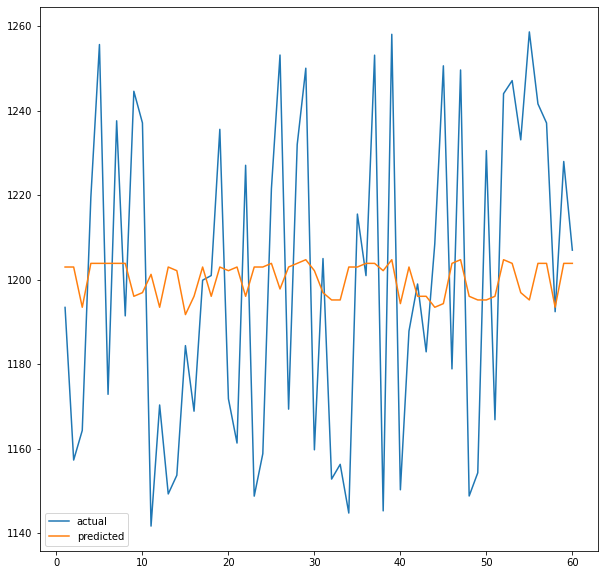

In [8]:
M1 = pd.DataFrame({'actual':y_test, 'predicted':pred})
M1.index = range(1,len(y_test)+1)
M1.plot(figsize=(10,10))

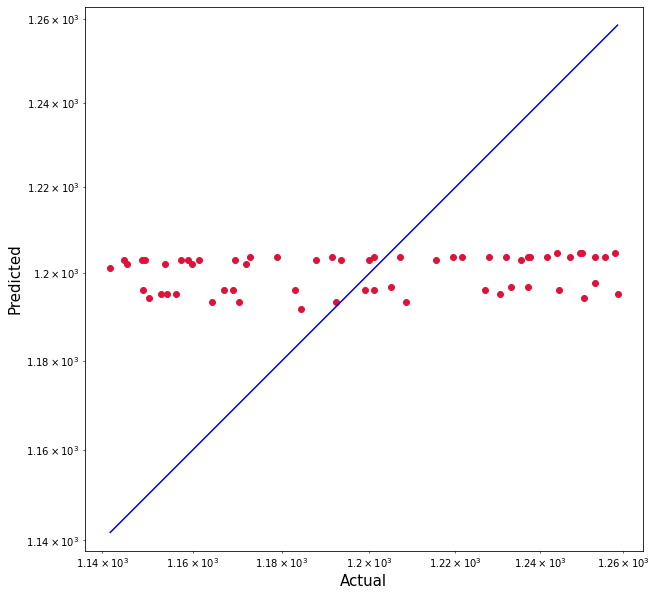

In [9]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(pred), max(y_test))
p2 = min(min(pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.axis('equal')
plt.savefig('m1.png')
plt.show()